# Tugas 1: Image Manipulation dengan Paradigma Fungsional

Program ini melakukan manipulasi gambar menggunakan konsep paradigma fungsional seperti:
- Higher-order functions
- Function composition
- Decorators

In [25]:
# Import library yang diperlukan
from PIL import Image, ImageEnhance, ImageFilter, ImageDraw, ImageFont
import matplotlib.pyplot as plt
from functools import reduce
import os

## Definisi Fungsi-Fungsi Manipulasi dengan Paradigma Fungsional

In [26]:
# Decorator untuk logging transformasi
def log_transformation(func):
    """Decorator untuk mencatat setiap transformasi yang dilakukan"""
    def wrapper(*args, **kwargs):
        print(f"✓ Menerapkan: {func.__name__.replace('_', ' ').title()}")
        result = func(*args, **kwargs)
        return result
    return wrapper

# Higher-order function untuk membuat fungsi transformasi
def create_transformer(transform_func):
    """Higher-order function yang menerima fungsi dan mengembalikan fungsi baru"""
    return lambda img: transform_func(img)

In [27]:
# Fungsi-fungsi transformasi gambar (Pure Functions)

@log_transformation
def adjust_brightness(image, factor=1.5):
    """Meningkatkan kecerahan gambar sebesar 50%"""
    enhancer = ImageEnhance.Brightness(image)
    return enhancer.enhance(factor)

@log_transformation
def resize_image(image, size=(300, 300)):
    """Mengubah ukuran gambar menjadi 300x300 pixel"""
    return image.resize(size, Image.Resampling.LANCZOS)

@log_transformation
def add_border(image, border_width=20, border_color='black'):
    """Menambahkan border hitam dengan lebar 20 pixel"""
    width, height = image.size
    new_width = width + 2 * border_width
    new_height = height + 2 * border_width
    
    bordered_image = Image.new(image.mode, (new_width, new_height), border_color)
    bordered_image.paste(image, (border_width, border_width))
    return bordered_image

@log_transformation
def sharpen_image(image):
    """Mempertajam gambar"""
    return image.filter(ImageFilter.SHARPEN)

@log_transformation
def convert_to_grayscale(image):
    """Mengubah gambar menjadi grayscale"""
    return image.convert('L')

@log_transformation
def add_watermark(image, text="Your Name", position='bottom_right'):
    """Menambahkan watermark di ujung kanan bawah gambar"""
    # Convert ke RGB jika grayscale untuk menambahkan watermark
    if image.mode == 'L':
        image = image.convert('RGB')
    
    draw = ImageDraw.Draw(image)
    
    # Gunakan font default
    try:
        font = ImageFont.truetype("arial.ttf", 20)
    except:
        font = ImageFont.load_default()
    
    # Hitung posisi watermark
    bbox = draw.textbbox((0, 0), text, font=font)
    text_width = bbox[2] - bbox[0]
    text_height = bbox[3] - bbox[1]
    
    width, height = image.size
    x = width - text_width - 10
    y = height - text_height - 10
    
    # Tambahkan watermark dengan outline
    draw.text((x-1, y-1), text, fill='black', font=font)
    draw.text((x+1, y-1), text, fill='black', font=font)
    draw.text((x-1, y+1), text, fill='black', font=font)
    draw.text((x+1, y+1), text, fill='black', font=font)
    draw.text((x, y), text, fill='white', font=font)
    
    return image

## Function Composition - Menggabungkan Transformasi

In [28]:
# Function composition menggunakan reduce (konsep functional programming)
def compose(*functions):
    """
    Menggabungkan beberapa fungsi menjadi satu pipeline
    Higher-order function yang menggunakan reduce untuk komposisi fungsi
    """
    return lambda x: reduce(lambda acc, func: func(acc), functions, x)

# Closure untuk menyimpan konfigurasi transformasi
def create_image_pipeline(watermark_text="Your Name"):
    """
    Closure yang mengembalikan fungsi pipeline dengan konfigurasi spesifik
    """
    def pipeline(image):
        # Pipeline transformasi sesuai urutan yang diminta
        transformations = [
            lambda img: adjust_brightness(img, 1.5),  # Kecerahan +50%
            lambda img: resize_image(img, (300, 300)),  # Resize 300x300
            lambda img: add_border(img, 20, 'black'),  # Border hitam 20px
            sharpen_image,  # Pertajam
            convert_to_grayscale,  # Grayscale
            lambda img: add_watermark(img, watermark_text)  # Watermark
        ]
        
        # Gunakan compose untuk menggabungkan semua transformasi
        composed_transform = compose(*transformations)
        return composed_transform(image)
    
    return pipeline

## Fungsi Visualisasi Perbandingan

In [29]:
# Higher-order function untuk visualisasi
def create_comparison_viewer(title_func):
    """
    Higher-order function yang menerima fungsi untuk generate title
    dan mengembalikan fungsi visualisasi
    """
    def viewer(original, processed):
        fig, axes = plt.subplots(1, 2, figsize=(15, 7))
        
        # Gambar asli
        axes[0].imshow(original)
        axes[0].set_title(title_func('Original'), fontsize=14, fontweight='bold')
        axes[0].axis('off')
        
        # Gambar hasil
        axes[1].imshow(processed, cmap='gray')
        axes[1].set_title(title_func('Processed'), fontsize=14, fontweight='bold')
        axes[1].axis('off')
        
        plt.tight_layout()
        plt.show()
        
        # Tampilkan info
        print(f"\n{'='*60}")
        print(f"Original Image Size: {original.size}")
        print(f"Processed Image Size: {processed.size}")
        print(f"Original Mode: {original.mode}")
        print(f"Processed Mode: {processed.mode}")
        print(f"{'='*60}")
    
    return viewer

# Lambda function untuk generate title (pure function)
generate_title = lambda label: f"🖼️  {label} Image"

# Buat viewer menggunakan higher-order function
display_comparison = create_comparison_viewer(generate_title)

## Eksekusi Program Utama

IMAGE MANIPULATION - PARADIGMA FUNGSIONAL

Memproses gambar: esp32.jpg


Menerapkan transformasi:

✓ Menerapkan: Adjust Brightness
✓ Menerapkan: Resize Image
✓ Menerapkan: Add Border
✓ Menerapkan: Sharpen Image
✓ Menerapkan: Convert To Grayscale
✓ Menerapkan: Add Watermark

✓ Gambar berhasil disimpan di: D:\Prak. Fungsional\modul6\images\esp32_edited.jpg



C:\Users\narut\AppData\Local\Temp\ipykernel_18704\2954112313.py:20: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


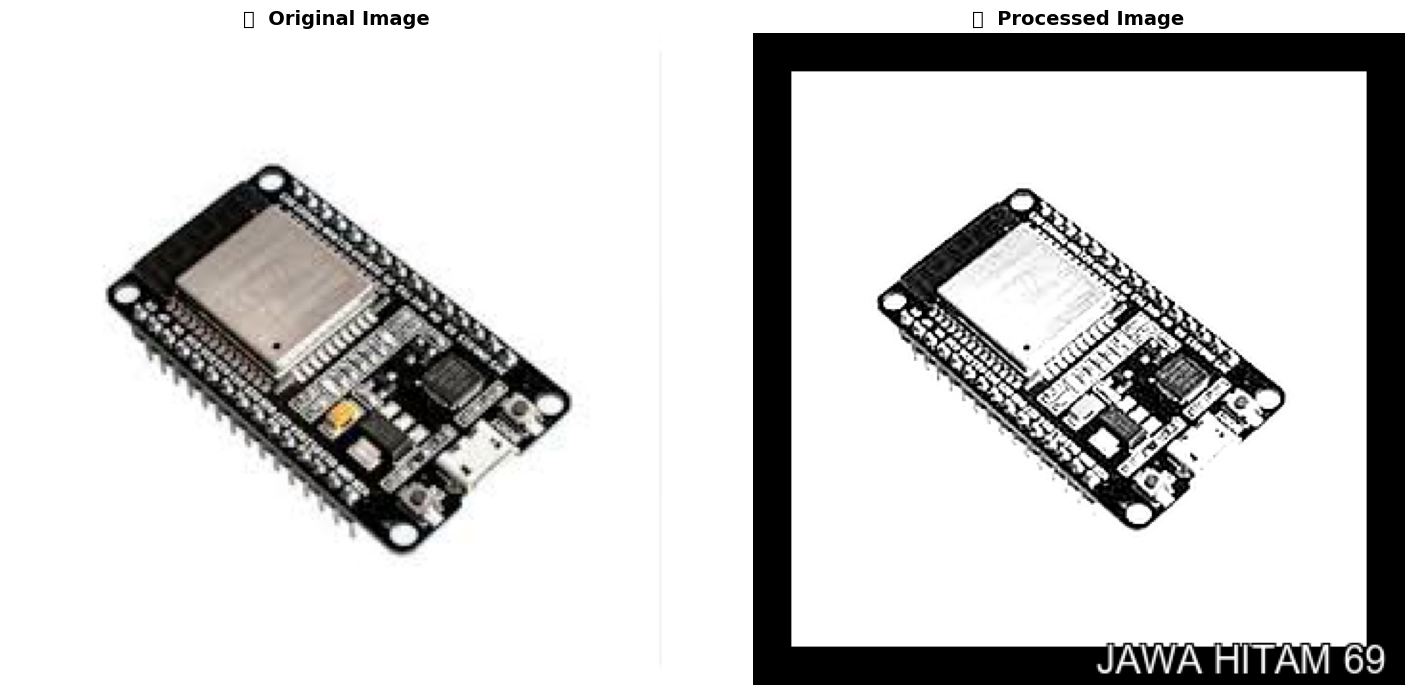


Original Image Size: (225, 225)
Processed Image Size: (340, 340)
Original Mode: RGB
Processed Mode: RGB


In [30]:
# Path file
image_path = r"D:\Prak. Fungsional\modul6\images\esp32.jpg"
output_path = r"D:\Prak. Fungsional\modul6\images\esp32_edited.jpg"

# Ganti dengan nama Anda
YOUR_NAME = "JAWA HITAM 69"  # <-- GANTI DENGAN NAMA ANDA

print("="*60)
print("IMAGE MANIPULATION - PARADIGMA FUNGSIONAL")
print("="*60)
print(f"\nMemproses gambar: {os.path.basename(image_path)}\n")

# Load gambar asli
original_image = Image.open(image_path)

# Buat pipeline dengan closure (menggunakan nama watermark)
image_pipeline = create_image_pipeline(watermark_text=YOUR_NAME)

# Proses gambar menggunakan pipeline
print("\nMenerapkan transformasi:\n")
processed_image = image_pipeline(original_image.copy())

# Simpan gambar hasil
processed_image.save(output_path)
print(f"\n✓ Gambar berhasil disimpan di: {output_path}\n")

# Tampilkan perbandingan
display_comparison(original_image, processed_image)

## Demonstrasi Konsep Functional Programming

Program ini mengimplementasikan konsep-konsep paradigma fungsional:

1. **Higher-Order Functions**: 
   - `create_transformer()` - menerima fungsi sebagai parameter
   - `create_comparison_viewer()` - mengembalikan fungsi baru
   - `compose()` - menggabungkan fungsi-fungsi

2. **Closures**: 
   - `create_image_pipeline()` - menyimpan konfigurasi watermark dalam scope

3. **Decorators**: 
   - `@log_transformation` - menambah fungsi logging tanpa modifikasi fungsi asli

4. **Pure Functions**: 
   - Semua fungsi transformasi tidak mengubah gambar original
   - Selalu mengembalikan gambar baru

5. **Function Composition**: 
   - Menggunakan `reduce()` untuk menggabungkan transformasi
   - Pipeline yang dapat dikombinasikan dengan fleksibel